In [1]:
from pymatgen.io.lammps.outputs import parse_lammps_log
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
vis_path = "/home/rramji/HOME/vis/md_freeze/"

In [3]:
thermo = parse_lammps_log(vis_path + "simplified_mc.log")

In [4]:
len(thermo)

5

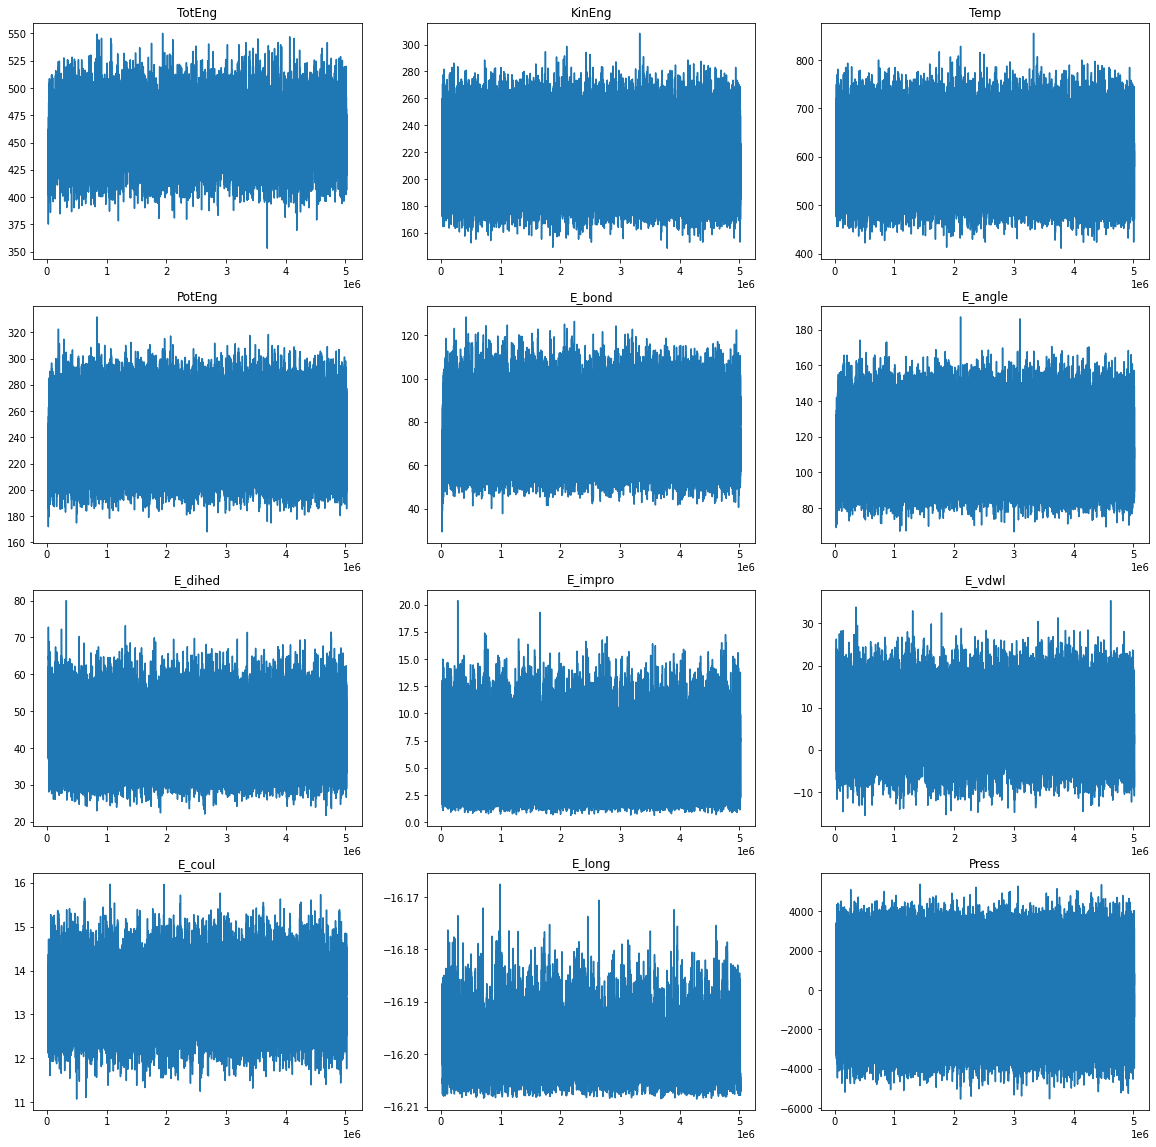

In [5]:
fig, axs = plt.subplots(4,3, figsize=(20,20))
dat = thermo[4].columns[1:]
x = thermo[4]['Step']

for prop,ax in zip(dat, axs.ravel()):
    ax.set_title(prop)
    ax.plot(x,thermo[4][prop])
    # ax.plot(x,expanded_cell_thermo[4][prop], color='black')
    
plt.show()

In [6]:
import MDAnalysis as mda
# from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

In [7]:
%pwd

'/mnt/c/Users/rober/HOME/Research'

In [11]:
system = mda.Universe("/home/rramji/HOME/Research/qd-crosslink/monte-carlo-test/struct_file/oleic_xlig.mol2", vis_path + "simplified_mc.600K.prod_md.lammpsdump")

In [12]:
xlig = system.atoms[0:68]
oleic = system.atoms[68:]

In [17]:
%%time
oleic_analysis = {
    "COM": [],
    "COG": []
}

xlig_analysis = {
    "COM": [],
    "COG": []
}

for ts in system.trajectory:
    xlig.wrap()
    oleic.wrap()
    oleic_analysis['COM'].append(oleic.center_of_mass())
    oleic_analysis['COG'].append(oleic.center_of_geometry())
    xlig_analysis['COM'].append(xlig.center_of_mass())
    xlig_analysis['COG'].append(xlig.center_of_geometry())

CPU times: user 47.7 s, sys: 771 ms, total: 48.5 s
Wall time: 1min 6s


In [13]:
fiver = xlig[0:4]
fiver = fiver.concatenate(xlig[30])

In [14]:
for atom in fiver:
    print(atom)

<Atom 1: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 2: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 3: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 4: N of type N.pl3 of resname UNL1, resid 1 and segid SYSTEM>
<Atom 31: C of type C.3 of resname UNL1, resid 1 and segid SYSTEM>


In [15]:
fiver_com = []

for ts in system.trajectory:
    fiver.wrap()
    fiver_com.append(fiver.center_of_mass())

In [16]:
fiver_mass_distance = [np.linalg.norm(fiver_com[i] - oleic_analysis['COM'][i]) for i in range(len(system.trajectory))]

NameError: name 'oleic_analysis' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(fiver_mass_distance, color='black')
ax.tick_params(axis='y', labelcolor='black')

ax2 = ax.twinx()

ax2.plot(control_thermo[4]['PotEng'], color='blue')
ax2.tick_params(axis='y', labelcolor="blue")

plt.show()